## Import

In [1]:
import pandas as pd
import csv 
import numpy as np
import matplotlib.pyplot as plt

#Dataset Link : https://www.kaggle.com/code/desalegngeb/heart-disease-predictions/notebook

df = pd.read_csv("heart.csv").astype("Float32")
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1.0,0.0,125.0,212.0,0.0,1.0,168.0,0.0,1.0,2.0,2.0,3.0,0.0
1,53.0,1.0,0.0,140.0,203.0,1.0,0.0,155.0,1.0,3.1,0.0,0.0,3.0,0.0
2,70.0,1.0,0.0,145.0,174.0,0.0,1.0,125.0,1.0,2.6,0.0,0.0,3.0,0.0
3,61.0,1.0,0.0,148.0,203.0,0.0,1.0,161.0,0.0,0.0,2.0,1.0,3.0,0.0
4,62.0,0.0,0.0,138.0,294.0,1.0,1.0,106.0,0.0,1.9,1.0,3.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59.0,1.0,1.0,140.0,221.0,0.0,1.0,164.0,1.0,0.0,2.0,0.0,2.0,1.0
1021,60.0,1.0,0.0,125.0,258.0,0.0,0.0,141.0,1.0,2.8,1.0,1.0,3.0,0.0
1022,47.0,1.0,0.0,110.0,275.0,0.0,0.0,118.0,1.0,1.0,1.0,1.0,2.0,0.0
1023,50.0,0.0,0.0,110.0,254.0,0.0,0.0,159.0,0.0,0.0,2.0,0.0,2.0,1.0


## Data Dictionary

    age: age in years
    sex: sex
        1 = male
        0 = female
    cp: chest pain type
        Value 0: typical angina
        Value 1: atypical angina
        Value 2: non-anginal pain
        Value 3: asymptomatic
    trestbps: resting blood pressure (in mm Hg on admission to the hospital)
    chol: serum cholestoral in mg/dl
    fbs: (fasting blood sugar > 120 mg/dl)
        1 = true;
        0 = false
    restecg: resting electrocardiographic results
        Value 0: normal
        Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    thalach: maximum heart rate achieved
    exang: exercise induced angina
        1 = yes
        0 = no
    oldpeak = ST depression induced by exercise relative to rest
    slope: the slope of the peak exercise ST segment
        Value 0: upsloping
        Value 1: flat
        Value 2: downsloping
    ca: number of major vessels (0-3) colored by flourosopy
    thal:
        0 = error (in the original dataset 0 maps to NaN's)
        1 = fixed defect
        2 = normal
        3 = reversable defect
    target (the lable):
        0 = no disease,
        1 = disease


## Correlation

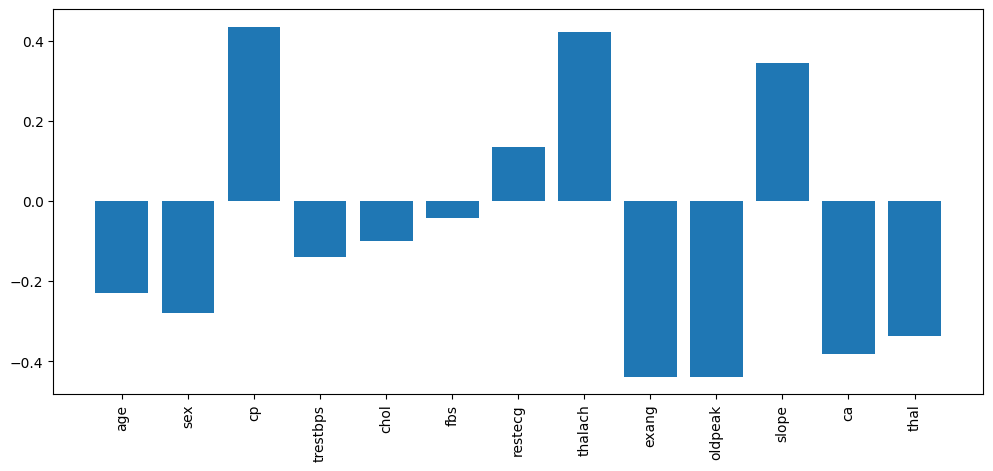

Dropped columns :  ['trestbps', 'chol', 'fbs', 'restecg']


,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1.0,0.0,168.0,0.0,1.0,2.0,2.0,3.0,0.0
1,53.0,1.0,0.0,155.0,1.0,3.1,0.0,0.0,3.0,0.0
2,70.0,1.0,0.0,125.0,1.0,2.6,0.0,0.0,3.0,0.0
3,61.0,1.0,0.0,161.0,0.0,0.0,2.0,1.0,3.0,0.0
4,62.0,0.0,0.0,106.0,0.0,1.9,1.0,3.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1020,59.0,1.0,1.0,164.0,1.0,0.0,2.0,0.0,2.0,1.0
1021,60.0,1.0,0.0,141.0,1.0,2.8,1.0,1.0,3.0,0.0
1022,47.0,1.0,0.0,118.0,1.0,1.0,1.0,1.0,2.0,0.0
1023,50.0,0.0,0.0,159.0,0.0,0.0,2.0,0.0,2.0,1.0


In [2]:
corr_limit = 0.20   #define the hight limit of the graph

corr = df.corr()
x = list((corr.columns)[:-1])
y =list((corr.iloc[-1,:]).iloc[:-1])

plt.figure(figsize=(12,5))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

drop = []
for i in range(len(x)):
    if(y[i]<=corr_limit and y[i]>=(-corr_limit)):
        if 'AgeCategory' in x[i]:
            continue
        drop.append(x[i])

print("Dropped columns : ",drop)
df.drop(drop,axis=1,inplace=True)
df


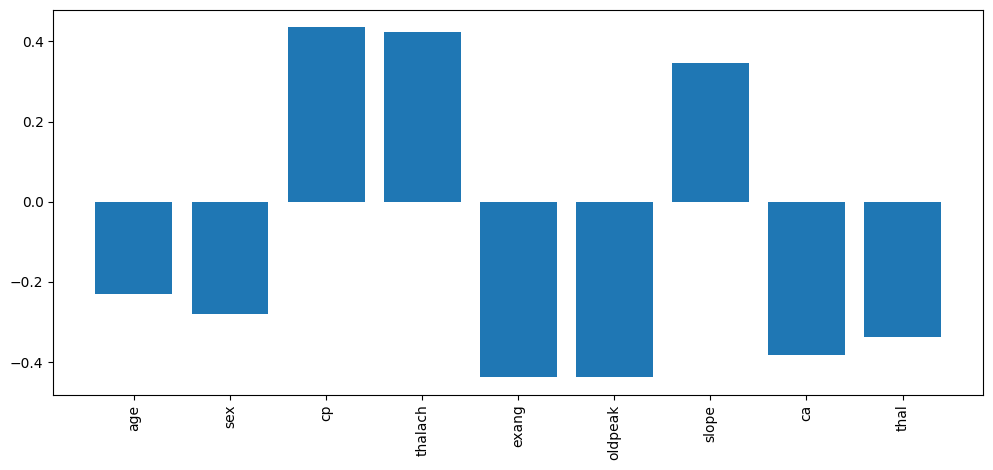

In [3]:
corr = df.corr()
x = list((corr.columns)[:-1])
y =list((corr.iloc[-1,:]).iloc[:-1])

plt.figure(figsize=(12,5))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In [4]:
print("Finding out all the unique values \n\n")
print("The columns are: ",df.columns)

print("Age: ",df["age"].unique())
print("sex: ",df["sex"].unique())
print("cp: ",df["cp"].unique())
print("thalach: ",df["thalach"].unique())
print("exang: ",df["exang"].unique())
print("oldpeak: ",df["oldpeak"].unique())
print("slope: ",df["slope"].unique())
print("ca: ",df["ca"].unique())
print("thal: ",df["thal"].unique())
print("target: ",df["target"].unique())



Finding out all the unique values 


The columns are:  Index(['age', 'sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca',
       'thal', 'target'],
      dtype='object')
Age:  <FloatingArray>
[52.0, 53.0, 70.0, 61.0, 62.0, 58.0, 55.0, 46.0, 54.0, 71.0, 43.0, 34.0, 51.0,
 50.0, 60.0, 67.0, 45.0, 63.0, 42.0, 44.0, 56.0, 57.0, 59.0, 64.0, 65.0, 41.0,
 66.0, 38.0, 49.0, 48.0, 29.0, 37.0, 47.0, 68.0, 76.0, 40.0, 39.0, 77.0, 69.0,
 35.0, 74.0]
Length: 41, dtype: Float32
sex:  <FloatingArray>
[1.0, 0.0]
Length: 2, dtype: Float32
cp:  <FloatingArray>
[0.0, 1.0, 2.0, 3.0]
Length: 4, dtype: Float32
thalach:  <FloatingArray>
[168.0, 155.0, 125.0, 161.0, 106.0, 122.0, 140.0, 145.0, 144.0, 116.0, 136.0,
 192.0, 156.0, 142.0, 109.0, 162.0, 165.0, 148.0, 172.0, 173.0, 146.0, 179.0,
 152.0, 117.0, 115.0, 112.0, 163.0, 147.0, 182.0, 105.0, 150.0, 151.0, 169.0,
 166.0, 178.0, 132.0, 160.0, 123.0, 139.0, 111.0, 180.0, 164.0, 202.0, 157.0,
 159.0, 170.0, 138.0, 175.0, 158.0, 126.0, 143.0, 141.0, 167

## Process Data

In [5]:
#performing one hot encoding
#These are the columns : 'age', 'sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca'
data = pd.get_dummies(df, columns=["sex","cp","exang","slope","thal"])
data

,age,thalach,oldpeak,ca,target,sex_0.0,sex_1.0,cp_0.0,cp_1.0,cp_2.0,cp_3.0,exang_0.0,exang_1.0,slope_0.0,slope_1.0,slope_2.0,thal_0.0,thal_1.0,thal_2.0,thal_3.0
0,52.0,168.0,1.0,2.0,0.0,False,True,True,False,False,False,True,False,False,False,True,False,False,False,True
1,53.0,155.0,3.1,0.0,0.0,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True
2,70.0,125.0,2.6,0.0,0.0,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True
3,61.0,161.0,0.0,1.0,0.0,False,True,True,False,False,False,True,False,False,False,True,False,False,False,True
4,62.0,106.0,1.9,3.0,0.0,True,False,True,False,False,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59.0,164.0,0.0,0.0,1.0,False,True,False,True,False,False,False,True,False,False,True,False,False,True,False
1021,60.0,141.0,2.8,1.0,0.0,False,True,True,False,False,False,False,True,False,True,False,False,False,False,True
1022,47.0,118.0,1.0,1.0,0.0,False,True,True,False,False,False,False,True,False,True,False,False,False,True,False
1023,50.0,159.0,0.0,0.0,1.0,True,False,True,False,False,False,True,False,False,False,True,False,False,True,False


In [6]:
#drop binary columns 
print(data.columns)
x=data.drop(["exang_0.0","target"],axis=1)
y=data["target"]
x.shape,y.shape

Index(['age', 'thalach', 'oldpeak', 'ca', 'target', 'sex_0.0', 'sex_1.0',
       'cp_0.0', 'cp_1.0', 'cp_2.0', 'cp_3.0', 'exang_0.0', 'exang_1.0',
       'slope_0.0', 'slope_1.0', 'slope_2.0', 'thal_0.0', 'thal_1.0',
       'thal_2.0', 'thal_3.0'],
      dtype='object')


((1025, 18), (1025,))

## DEEP LEARNING

In [7]:
import torch
import torch.nn as nn
device="cuda"

In [8]:
x_data=torch.tensor(x.values.astype("float32"),dtype=torch.float32,device=device)
y_data=torch.tensor(y.values,dtype=torch.float32,device=device)
x_data,y_data

(tensor([[ 52.0000, 168.0000,   1.0000,  ...,   0.0000,   0.0000,   1.0000],
         [ 53.0000, 155.0000,   3.1000,  ...,   0.0000,   0.0000,   1.0000],
         [ 70.0000, 125.0000,   2.6000,  ...,   0.0000,   0.0000,   1.0000],
         ...,
         [ 47.0000, 118.0000,   1.0000,  ...,   0.0000,   1.0000,   0.0000],
         [ 50.0000, 159.0000,   0.0000,  ...,   0.0000,   1.0000,   0.0000],
         [ 54.0000, 113.0000,   1.4000,  ...,   0.0000,   0.0000,   1.0000]],
        device='cuda:0'),
 tensor([0., 0., 0.,  ..., 0., 1., 0.], device='cuda:0'))

In [13]:
#getting batch
def get_batch(batch_size):
    # Get a random index to select the batch from the data
    idx = torch.randperm(x_data.size(0))[:batch_size]
    # Get the batch tensors based on the selected index
    x_batch = x_data[idx]
    y_batch = y_data[idx]
    #add a dimension to each element in y_batch
    y_batch = y_batch.unsqueeze(1)
    return x_batch, y_batch

In [10]:
get_batch(5)

(tensor([[6.6000e+01, 1.3200e+02, 1.0000e-01, 1.0000e+00, 0.0000e+00, 1.0000e+00,
          1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
          0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00],
         [6.4000e+01, 9.6000e+01, 2.2000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
          1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00],
         [5.1000e+01, 1.4200e+02, 1.5000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00],
         [4.8000e+01, 1.8000e+02, 2.0000e-01, 0.0000e+00, 0.0000e+00, 1.0000e+00,
          0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00],
         [4.

In [11]:
#Building the Neural Network

class neuralnet(nn.Module):

    def __init__(self):
        super(neuralnet,self).__init__()

        self.fc1=nn.Linear(18,40)
        self.fc2=nn.Linear(40,50)
        self.fc3=nn.Linear(50,60)
        self.fc4=nn.Linear(60,70)
        self.fc5=nn.Linear(70,80)
        self.fc6=nn.Linear(80,90)
        self.fc7=nn.Linear(90,100)
        self.fc8=nn.Linear(100,110)
        self.fc9=nn.Linear(110,120)
        self.fc10=nn.Linear(120,130)
        self.fc11=nn.Linear(130,120)
        self.fc12=nn.Linear(120,110)
        self.fc13=nn.Linear(110,100)
        self.fc14=nn.Linear(100,90)
        self.fc15=nn.Linear(90,80)
        self.fc16=nn.Linear(80,70)
        self.fc17=nn.Linear(70,60)
        self.fc18=nn.Linear(60,50)
        self.fc19=nn.Linear(50,40)
        self.fc20=nn.Linear(40,30)
        self.fc21=nn.Linear(30,20)
        self.fc22=nn.Linear(20,10)
        self.fc23=nn.Linear(10,1)
        self.af=nn.GELU()
        self.sigmoid=nn.Sigmoid()
        self.dropout = nn.Dropout(0.05)

    def forward(self,x):
        
        out = self.fc1(x)
        out = self.af(out)
        out = self.fc2(out)
        out = self.af(out)
        out = self.fc3(out)

        out = self.fc4(out)
        out = self.af(out)
        out = self.fc5(out)
        out = self.af(out)
        out = self.fc6(out)
        out = self.dropout(out)
        out = self.fc7(out)
        out = self.af(out)
        out = self.fc8(out)
        out = self.af(out)
        out = self.fc9(out)
        out = self.dropout(out)
        out = self.fc10(out)
        out = self.af(out)
        out = self.fc11(out)
        out = self.af(out)
        out = self.fc12(out)
        out = self.dropout(out)
        out = self.fc13(out)
        out = self.af(out)
        out = self.fc14(out)
        out = self.af(out)
        out = self.fc15(out)
        out = self.dropout(out)
        out = self.fc16(out)
        out = self.af(out)
        out = self.fc17(out)
        out = self.af(out)
        out = self.fc18(out)
        out = self.dropout(out)
        out = self.fc19(out)
        out = self.af(out)
        out = self.fc20(out)
        out = self.af(out)
        out = self.fc21(out)
        out = self.fc22(out)
        out = self.fc23(out)

        out=self.sigmoid(out)
        return(out)


In [12]:
#testing out the object and compare it with the actual output

model=neuralnet().to(device=device)
x,y=get_batch(5)
y_got=model(x)
y_got,y


(tensor([[0.3765],
         [0.3764],
         [0.3765],
         [0.3765],
         [0.3765]], device='cuda:0', grad_fn=<SigmoidBackward0>),
 tensor([[0.],
         [1.],
         [1.],
         [1.],
         [0.]], device='cuda:0'))

after 9, Loss =  0.7153128385543823Var =  nan
after 19, Loss =  0.6978304982185364Var =  0.00015281610831152648
after 29, Loss =  0.6884519457817078Var =  0.0001858495088526979
after 39, Loss =  0.6420078873634338Var =  0.000980160664767027
after 49, Loss =  0.6838827133178711Var =  0.0007359349983744323
after 59, Loss =  0.5951996445655823Var =  0.0019476887537166476
after 69, Loss =  0.5846177339553833Var =  0.0026754688005894423
after 79, Loss =  0.5674925446510315Var =  0.0033214259892702103
after 89, Loss =  0.550169050693512Var =  0.003944814670830965
after 99, Loss =  0.5401738882064819Var =  0.004426822066307068
after 109, Loss =  0.5137303471565247Var =  0.005140515044331551
after 119, Loss =  0.5186570882797241Var =  0.005467069335281849
after 129, Loss =  0.48351240158081055Var =  0.006206006743013859
after 139, Loss =  0.4162158966064453Var =  0.00810309313237667
after 149, Loss =  0.39646923542022705Var =  0.009906934574246407
after 159, Loss =  0.37173205614089966Var =  0

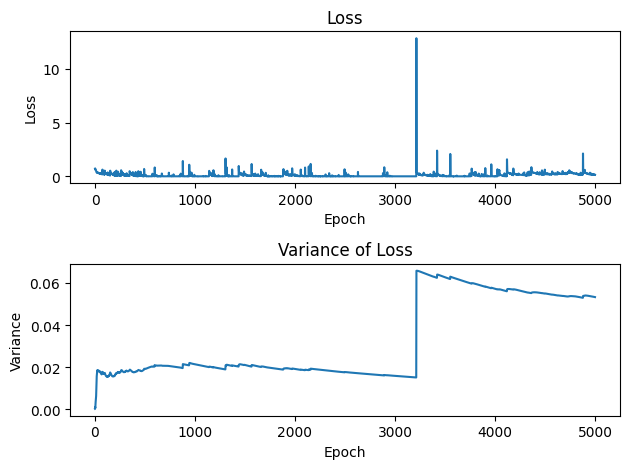

In [13]:
learning_rate = 0.001
epochs = 50000
batch_no = 5000
optimiser = torch.optim.Adam(model.parameters(),learning_rate)

losses = []
variances = []

for i in range(epochs):

    x,y=get_batch(batch_no)
    y_got=model(x)
    #Calculate Loss
    loss=nn.functional.binary_cross_entropy(y_got,y)
    loss.backward()    #d(cost)/d(w)

    #Update Weights
    optimiser.step()  #w_new=old_w-learning rate*(d(cost)/d(w))

    #Zero the gradients ater updating
    optimiser.zero_grad()  #delete calculated d(cost)/d(w)

    if(i+1)%10 == 0:
        print(f"after {i}, Loss = ", loss.item(), end = "")
        losses.append(loss.item())

        # calculate variance
        var = torch.var(torch.tensor(losses))
        print(f"Var = ", var.item())
        variances.append(var.item())

# plot losses
plt.subplot(2, 1, 1)
plt.plot(losses)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# plot variances
plt.subplot(2, 1, 2)
plt.plot(variances)
plt.title('Variance of Loss')
plt.xlabel('Epoch')
plt.ylabel('Variance')

plt.tight_layout()
plt.show()

In [23]:
a,b=get_batch(5)
model(a),b

(tensor([[0.9971],
         [0.0594],
         [0.0484],
         [0.0484],
         [0.9995]], device='cuda:0', grad_fn=<SigmoidBackward0>),
 tensor([[1.],
         [0.],
         [0.],
         [0.],
         [1.]], device='cuda:0'))

## save

In [24]:
torch.save(model,'Heart_disease.CookieNeko')

## load

In [20]:
bla = torch.load('Heart_disease.CookieNeko')
model = bla.to(device)

x,y=get_batch(5)

p = bla(x)

print("Predicted : ",p)
print("Actual : ",y)

Predicted :  tensor([[0.0484],
        [0.0484],
        [0.0484],
        [0.0484],
        [0.0484]], device='cuda:0', grad_fn=<SigmoidBackward0>)
Actual :  tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0')


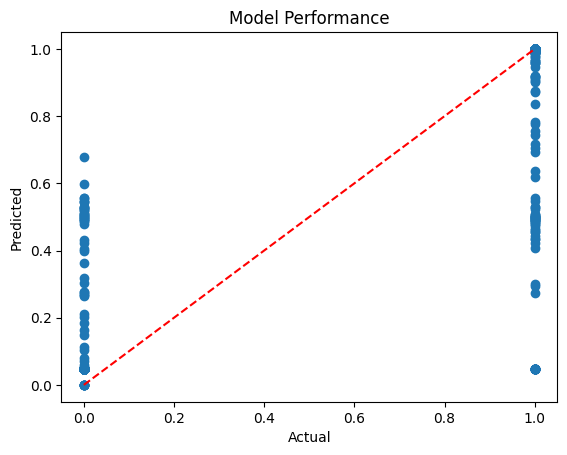

In [21]:

predicted = []
for i in range(len(x_data)):
    p = model(x_data[i]).cpu()
    predicted.append(p.detach().numpy())

x_data = x_data.cpu()
y_data = y_data.cpu()

plt.scatter(y_data, predicted)
plt.plot([min(y_data), max(y_data)], [min(y_data), max(y_data)], '--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Model Performance')
plt.show()
